<a href="https://colab.research.google.com/github/BingHungLee/BHAI-Daily-Practice/blob/main/%5B20210713%5D_Titanic_Kaggle_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score

from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

In [2]:
!git clone https://github.com/BingHungLee/Dataset.git

fatal: destination path 'Dataset' already exists and is not an empty directory.


In [3]:
cd /content/Dataset

/content/Dataset


In [4]:
Dta_train = pd.read_csv("titanic_train.csv")

## Pre-Processing

In [5]:
X = Dta_train[['Pclass','Sex','Age','Fare','Embarked']]
y = Dta_train['Survived'].values

In [6]:
#Preserve Non-NAN Value
non_nan_row = np.where(X.isnull().sum(axis=1)==0)[0]
X=X.iloc[non_nan_row,:]
X=X.reset_index(drop=True)
y = y[non_nan_row]

In [7]:
#Dummy Variables Handle
X = pd.concat([X, pd.get_dummies(X['Pclass']),pd.get_dummies(X['Sex']),pd.get_dummies(X['Embarked'])], axis =1)
X = X.drop(columns=['Pclass','Sex','Embarked'])

## Model Train I

In [8]:
#DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)
tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [9]:
#Model Validification
fitted_classes = tree.predict(X)
accuracy=accuracy_score(y.flatten(),fitted_classes)
print(accuracy)

0.9845505617977528


In [10]:
#Check Confusion Matrix
print(confusion_matrix(fitted_classes,y.flatten(),labels=[0,1]))  

[[424  11]
 [  0 277]]


## Model Train II

In [11]:
nTimes = 10
accuracy = np.zeros(nTimes)
for t in range(nTimes):
  Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=0)

  model = DecisionTreeClassifier().fit(X, y)

  #Model Validification
  fitted_classes = tree.predict(Xtest)
  accuracy[t]=accuracy_score(ytest,fitted_classes)

  print('%d: %f' %(t,accuracy[t]))
  
print(np.mean(accuracy))

0: 0.976636
1: 0.976636
2: 0.976636
3: 0.976636
4: 0.976636
5: 0.976636
6: 0.976636
7: 0.976636
8: 0.976636
9: 0.976636
0.9766355140186918


## Model Predict

In [12]:
Dta_test = pd.read_csv("titanic_test.csv")

In [13]:
X = Dta_test[['Pclass','Sex','Age','Fare','Embarked']]

#Preserve Non-NAN Value
non_nan_row = np.where(X.isnull().sum(axis=1)==0)[0]
X=X.iloc[non_nan_row,:]
X=X.reset_index(drop=True)
y = y[non_nan_row]

#Dummy Variables Handle
X = pd.concat([X, pd.get_dummies(X['Pclass']),pd.get_dummies(X['Sex']),pd.get_dummies(X['Embarked'])], axis =1)
X = X.drop(columns=['Pclass','Sex','Embarked'])

#DecisionTreeClassifier
#tree = DecisionTreeClassifier(max_depth=3).fit(X, y)

#Model Validification
pred_classes = tree.predict(X)
#accuracy=accuracy_score(y.flatten(),fitted_classes)
#print(accuracy)
pred_classes

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,

## Graphviz
https://graphviz.org/download/

In [16]:
!sudo apt install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [17]:
from sklearn import tree
from IPython.display import Image
import pydotplus

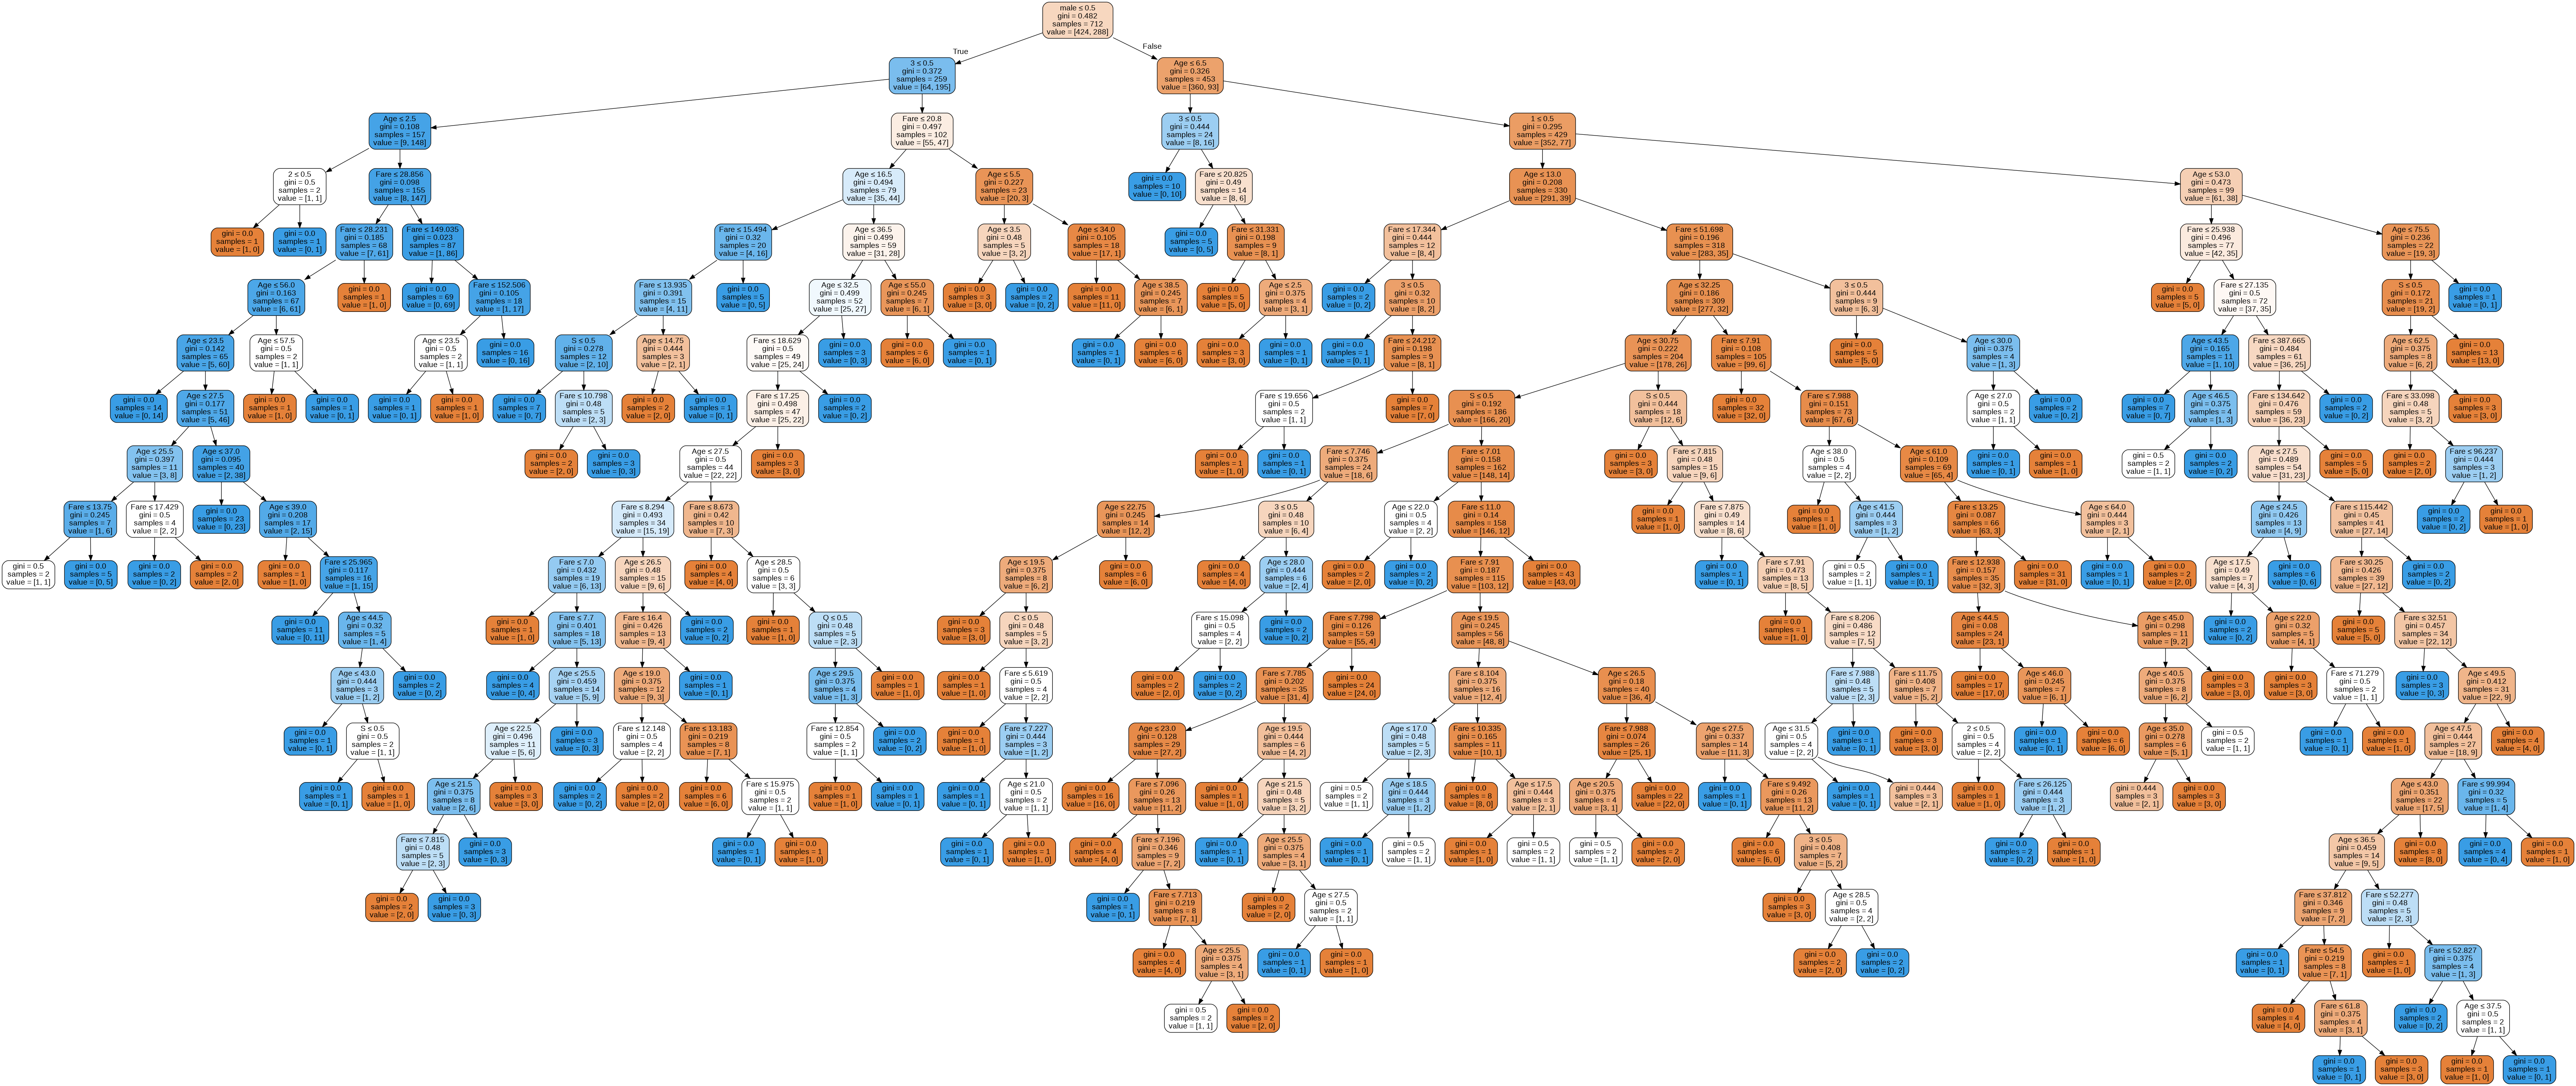

In [19]:
dot_data=tree.export_graphviz(model, out_file=None, feature_names=X.columns, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())